In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
path = os.path.join('data', 'migri_statistics', 'Decisions-First residence permit to Finland-012015-122022-en.csv')
first_permits_df = pd.read_csv(path, delimiter=';')
first_permits_df.rename(columns={'First residence permit to Finland': 'type'}, inplace=True)
display(first_permits_df.sample(10))

,Year,Month,type,Decision,Number
188,2016,12,Studies,Positive,640
798,2022,3,Studies,Negative,33
356,2018,9,Studies,Positive,239
826,2022,5,Work,Expired matter,7
432,2019,7,Family,Positive,894
232,2017,6,Family,Positive,795
26,2015,4,Other,Positive,39
547,2020,6,Studies,Negative,75
94,2015,12,Work,Positive,343
457,2019,10,Family,Negative,298


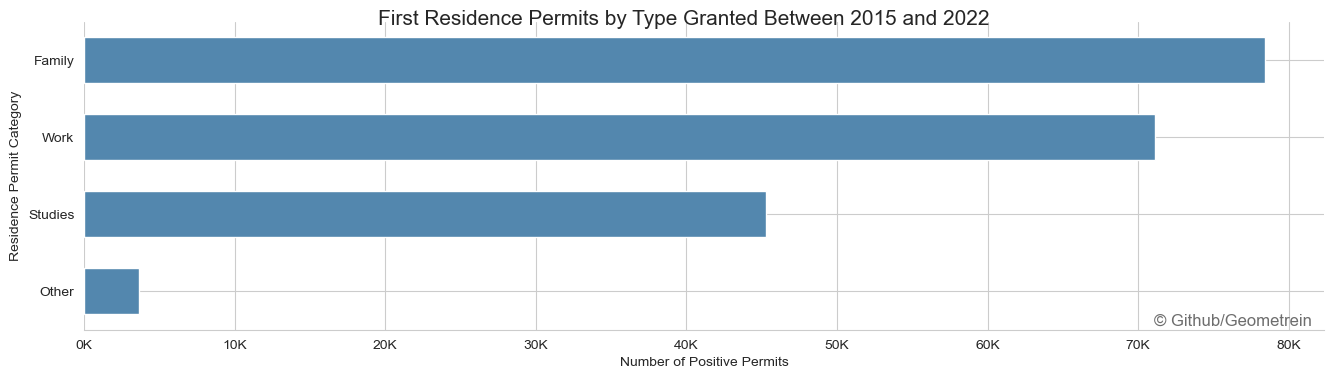

In [88]:
def plot_permits_by_type(input_df:pd.DataFrame) -> None:
    # data
    work_df = input_df.copy()
    work_df = work_df.loc[(work_df['Decision'] == 'Positive') & (work_df['Year'] < 2023)]
    grouped = work_df.groupby(['type'])['Number'].sum().reset_index()
    grouped.sort_values(by='Number', inplace=True, ascending=False)
    # Figure
    fig, ax = plt.subplots(figsize=(16, 4), facecolor='w')
    sns.barplot(data=grouped, x="Number", y="type", color='#4489BDff', orient='h', width=0.60, ax=ax, dodge=False)
    sns.despine(left=True)
    # Labels
    plt.suptitle(f"First Residence Permits by Type Granted Between 2015 and 2022", y=0.91, fontsize=15)
    ax.set(xlabel='Number of Positive Permits', ylabel=f'Residence Permit Category')
    ax.set_xticks(range(0, 90000, 10000))
    ax.set_xticklabels([str(i) + 'K' for i in range(0, 90, 10)])
    ax.grid('both')
    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.show()

plot_permits_by_type(input_df=first_permits_df)

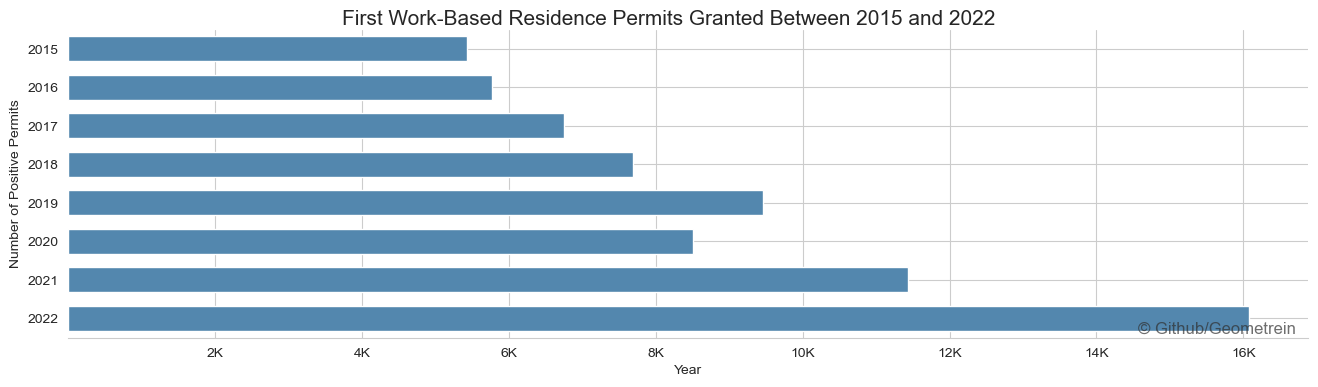

In [89]:
def plot_yearly_permits(input_df:pd.DataFrame) -> None:
    # Data
    work_df = input_df.loc[input_df['type'] == 'Work']
    work_df = work_df.loc[(work_df['Decision'] == 'Positive') & (work_df['Year'] < 2023)]
    grouped = work_df.groupby(['Year'])['Number'].sum().reset_index()
    # Figure
    fig, ax = plt.subplots(figsize=(16, 4), facecolor='w')
    sns.barplot(data=grouped, x="Number", y="Year", color='#4489BDff', orient='h', width=0.65, ax=ax, dodge=False, )
    sns.despine(left=True)
    # Labels
    plt.suptitle(f"First Work-Based Residence Permits Granted Between 2015 and 2022", y=0.93, fontsize=15)
    ax.set(xlabel='Year', ylabel=f'Number of Positive Permits')
    ax.set_xticks(range(2000, 18000, 2000))
    ax.set_xticklabels([str(i) + 'K' for i in range(2, 18, 2)])
    ax.set_axisbelow(True)
    ax.grid('both')
    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.show()

plot_yearly_permits(input_df=first_permits_df)

In [90]:
path = os.path.join('data', 'migri_statistics', 'Decisions-First residence permit to Finland-Age group-012015-122022-en.csv')
first_permits_age_df = pd.read_csv(path, delimiter=';')
display(first_permits_age_df.sample(10))

,Year,Month,Age group,Decision,Number
896,2021,9,35-64,Positive,690
190,2016,7,35-64,Positive,401
876,2021,8,14-17,Positive,101
368,2018,1,14-17,Positive,27
920,2021,11,14-17,Negative,16
870,2021,7,35-64,Expired matter,8
1111,2022,12,14-17,Negative,8
411,2018,5,18-34,Negative,194
154,2016,4,0-13,Positive,244
905,2021,10,14-17,Positive,52


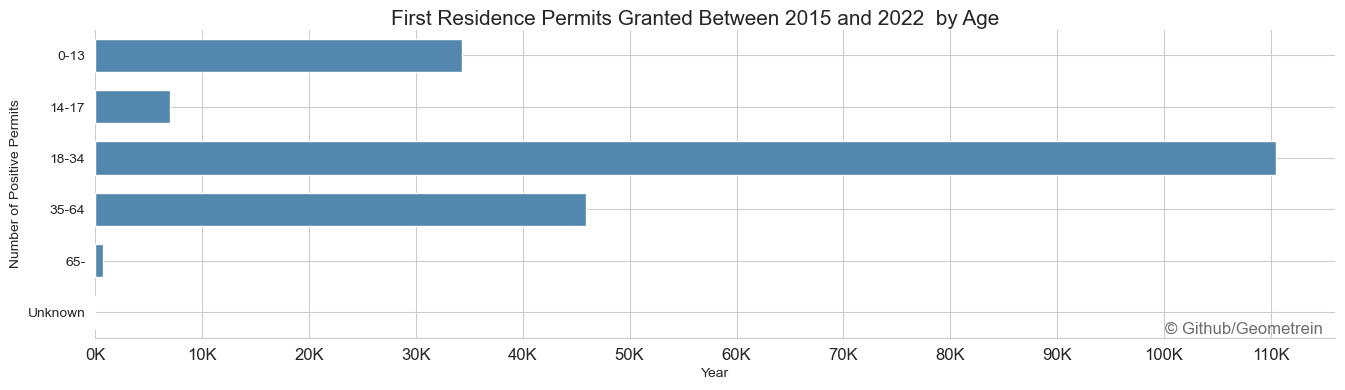

In [97]:
def plot_permits_by_age_group(input_df:pd.DataFrame) -> None:
    # Data
    work_df = input_df.loc[(input_df['Decision'] == 'Positive') & (input_df['Year'] < 2023)]
    grouped = work_df.groupby(['Age group'])['Number'].sum().reset_index()
    # Figure
    fig, ax = plt.subplots(figsize=(16, 4), facecolor='w')
    sns.barplot(data=grouped, x="Number", y="Age group", color='#4489BDff', orient='h', width=0.65, ax=ax, dodge=False, )
    sns.despine(left=True)
    # Labels
    plt.suptitle(f"First Residence Permits Granted Between 2015 and 2022  by Age", y=0.93, fontsize=15)
    ax.set(xlabel='Year', ylabel=f'Number of Positive Permits')
    ax.set_xticks(range(0, 120000, 10000))
    ax.set_xticklabels([str(i) + 'K' for i in range(0, 120, 10)])
    ax.set_axisbelow(True)
    ax.grid('both')
    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.show()

plot_permits_by_age_group(input_df=first_permits_age_df)

In [92]:
path = os.path.join('data', 'migri_statistics', 'Decisions-First residence permit to Finland-Citizenship-012015-122022-en.csv')
first_permits_citizenship_df = pd.read_csv(path, delimiter=';')
display(first_permits_citizenship_df.sample(10))

,Year,Month,Citizenship,Decision,Number
8310,2020,1.0,Kosovo,Positive,61.0
7095,2019,5.0,Côte dIvoire,Negative,2.0
3931,2017,6.0,Pakistan,Negative,24.0
7761,2019,9.0,Not clarified,Negative,3.0
3400,2017,2.0,Russian Federation,Negative,35.0
13378,2022,8.0,"Korea, Republic of (South Korea)",Expired matter,2.0
3662,2017,4.0,Philippines,Negative,22.0
4647,2017,11.0,Turkey,Positive,70.0
4827,2018,1.0,Colombia,Positive,2.0
1563,2015,12.0,Not clarified,Positive,7.0


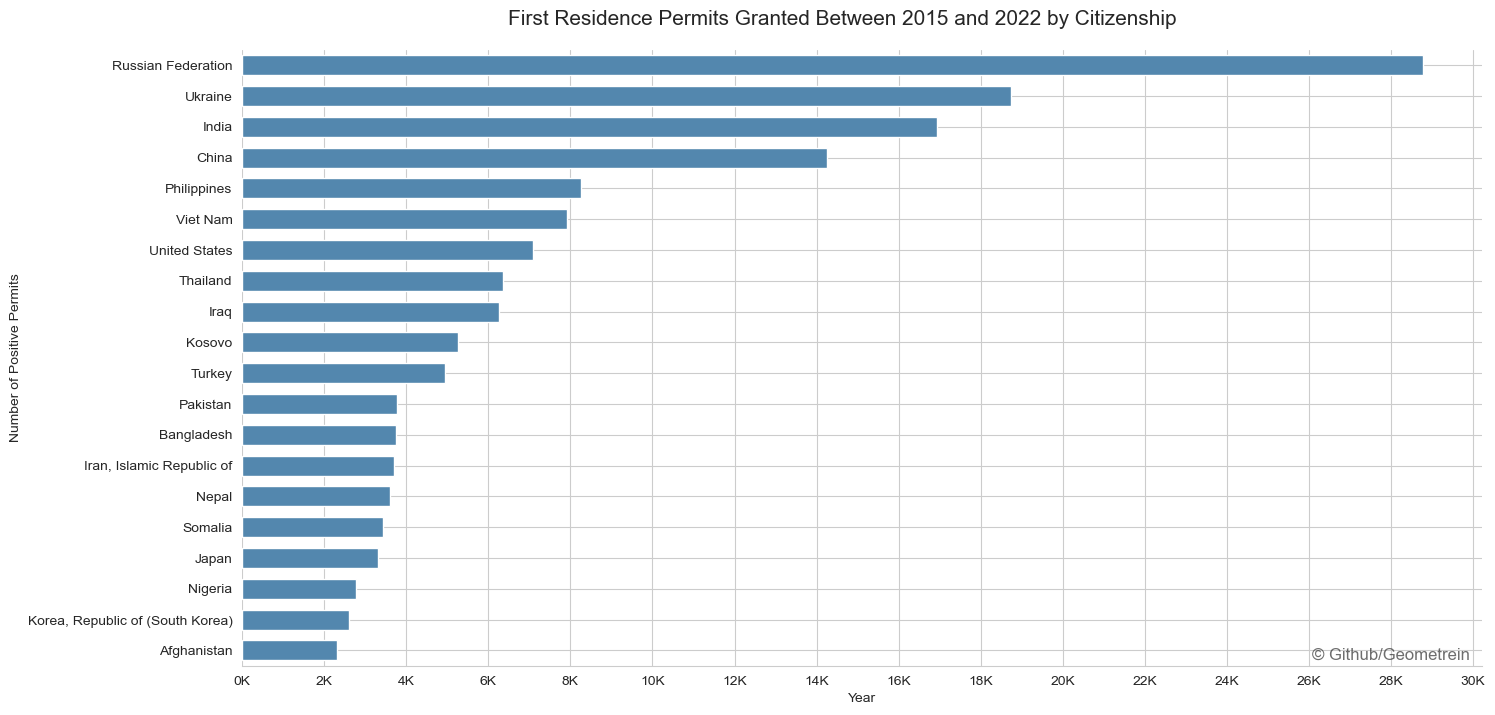

In [104]:
def plot_permits_by_citizenship(input_df:pd.DataFrame) -> None:
    # Data
    work_df = input_df.loc[(input_df['Decision'] == 'Positive')]
    grouped = work_df.groupby(['Citizenship'])['Number'].sum().reset_index()
    grouped.sort_values(by='Number', inplace=True, ascending=False)
    grouped = grouped[:20]
    # Figure
    fig, ax = plt.subplots(figsize=(16, 8), facecolor='w')
    sns.barplot(data=grouped, x="Number", y="Citizenship", color='#4489BDff', orient='h', width=0.65, ax=ax, dodge=False, )
    sns.despine(left=True)
    # Labels
    plt.suptitle(f"First Residence Permits Granted Between 2015 and 2022 by Citizenship", y=0.93, fontsize=15)
    ax.set(xlabel='Year', ylabel=f'Number of Positive Permits')
    ax.set_xticks(ticks=range(0, 32000, 2000))
    ax.set_xticklabels([str(i) + 'K' for i in range(0, 32, 2)])
    ax.set_axisbelow(True)
    ax.grid('both')
    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.show()

plot_permits_by_citizenship(input_df=first_permits_citizenship_df)